In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Layoffs.xlsx')
df.head()

,Year,Company,Industry,HeadQuarters,No. of Jobs
0,2024-03-01,Metro Bank,Banking,UK,1000
1,2024-03-01,PwC Australia,Financial Services,Australia,366
2,2024-03-01,Spruce Biosciences,Biotechnology,USA,21% of workforce
3,2024-03-01,Lumentum,Telecommunication,USA,750
4,2024-03-01,Alshaya Group,Hospitality,Kuwait,2000


In [ ]:
df.rename(columns={'Year':'Date'}, inplace=True)

In [ ]:
df.dtypes

Date            datetime64[ns]
Company                 object
Industry                object
HeadQuarters            object
No. of Jobs             object
dtype: object

In [ ]:
df['Date'] = df['Date'].dt.strftime('%m/%Y')
#This column contains rows of differnt types
df['No. of Jobs'] = df['No. of Jobs'].astype('str')

In [ ]:
df.head()

,Date,Company,Industry,HeadQuarters,No. of Jobs
0,03/2024,Metro Bank,Banking,UK,1000
1,03/2024,PwC Australia,Financial Services,Australia,366
2,03/2024,Spruce Biosciences,Biotechnology,USA,21% of workforce
3,03/2024,Lumentum,Telecommunication,USA,750
4,03/2024,Alshaya Group,Hospitality,Kuwait,2000


In [ ]:
df['No. of Jobs'].unique()

array(['1000', '366', '21% of workforce', '750', '2000', '1500', '900',
       '7150', '4000', '2370', '1600', '4800', '3100', '2700', '12000',
       '3500', '656', '400', '1900', '700', '2800', '1650', '1200', '272',
       '20000', '1867', '1800', '500', '340', '3421', '15% of Workforce',
       '20% of Workforce', '30000', '3400', '200', '1100', '1700 (VSS)',
       '1314', '940', '3000', '600', '725', '1300', '386',
       '6400 (Buyout)', '1592', '10000', '800', '547', '560',
       '900 (Furlough)', '50% of Employees', '450', '14000', '2500',
       '668', '1260 (2.5% of the workforce)', '29% of the workforce',
       '240', '440', '780 (14% of the Employees)', '30% of Employees',
       '5000', '2000 (3% of Employees)', '830 (16% of Employees)',
       '70% of Employees', '350', '12% of its Employees',
       '27% of Employees', '800 (3% of Employees)', '600 (Temporarily)',
       '936', '10% of its Employees', '20% of its Employees',
       '900 (7% of its Employees)', '360', 

In [ ]:
for index, row in df.iterrows():
  if '(' in row['No. of Jobs']:
    original_value = row['No. of Jobs']
    substring = original_value.split('(')[0].strip()
    df.at[index, 'No. of Jobs'] = substring

  elif '%' in row['No. of Jobs']:
    df.drop(index=index, inplace=True)

  elif 'employees' in row['No. of Jobs']:
    original_value = row['No. of Jobs']
    substring = original_value.split('employees')[0].strip()
    df.at[index, 'No. of Jobs'] = substring

print(df['No. of Jobs'].unique())

['1000' '366' '750' '2000' '1500' '900' '7150' '4000' '2370' '1600' '4800'
 '3100' '2700' '12000' '3500' '656' '400' '1900' '700' '2800' '1650'
 '1200' '272' '20000' '1867' '1800' '500' '340' '3421' '30000' '3400'
 '200' '1100' '1700' '1314' '940' '3000' '600' '725' '1300' '386' '6400'
 '1592' '10000' '800' '547' '560' '450' '14000' '2500' '668' '1260' '240'
 '440' '780' '5000' '830' '350' '936' '360' '300' '2400' '4600' '275'
 '335' '6600' '890' '740' '8400' '550' '393' '230' '715' '35000' '650'
 '8000' '7000' '1850' '551' '504' '379' '6000' '55000' '11000' '716' '770'
 '9000' '15000' '1400' '815' '743' '19000' '2200' '8500' '1250' '6650'
 '365' '3200' '18000' '3900' '388' '950' '320' '75']


In [ ]:
cols = ['Company', 'Industry', 'HeadQuarters']
df[cols].nunique()

Company         224
Industry         69
HeadQuarters     31
dtype: int64

<Axes: ylabel='Company'>

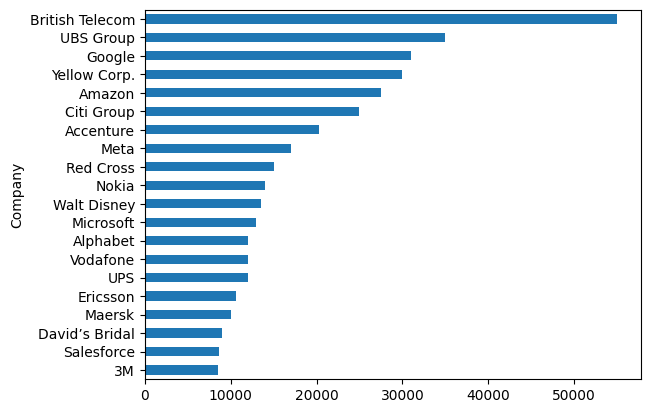

In [ ]:
df.groupby('Company')['No. of Jobs'].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='HeadQuarters'>

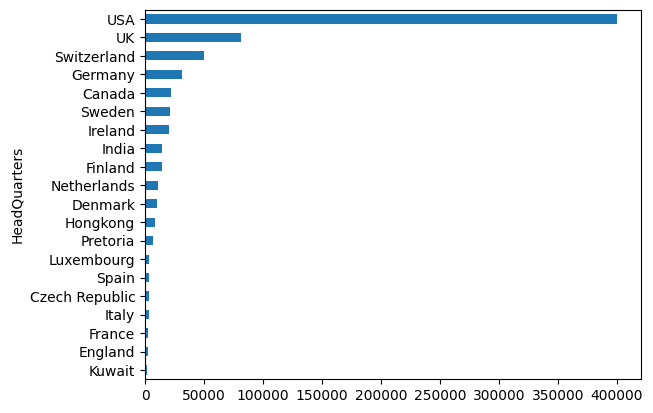

In [ ]:
df.groupby('HeadQuarters')['No. of Jobs'].sum().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='Industry'>

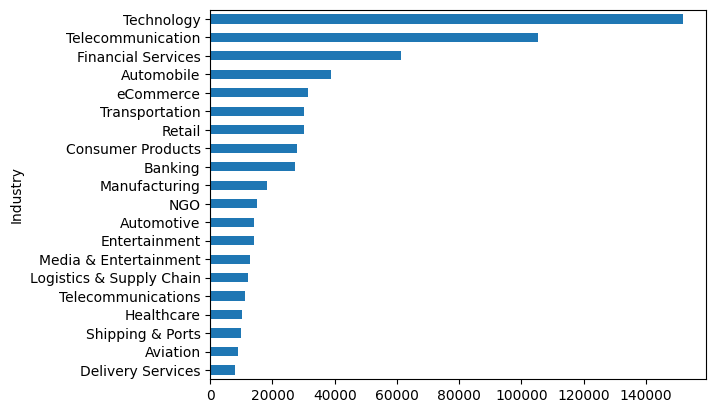

In [ ]:
df.groupby('Industry')['No. of Jobs'].sum().sort_values(ascending=True).tail(20).plot.barh()